In [3]:
# !unzip datset.zip

Archive:  datset.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [4]:
import pandas as pd

questions_df = pd.read_csv('/content/Questions.csv', encoding='latin1')

tags_df = pd.read_csv('/content/Tags.csv', encoding='latin1')


In [5]:
questions_df

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [6]:
# Filter the DataFrame to include only popular tags that appear more than 5000 times

tags_value_counts = tags_df['Tag'].value_counts()
popular_tags = tags_value_counts[tags_value_counts > 5000]
tags_df = tags_df[tags_df['Tag'].isin(popular_tags.index)].reset_index(drop=True)

tags_df

,Id,Tag
0,120,sql
1,120,asp.net
2,180,algorithm
3,260,c#
4,260,.net
...,...,...
1653710,40143190,bash
1653711,40143210,php
1653712,40143210,.htaccess
1653713,40143340,android


In [7]:
# Questions DataFrame
print("Questions DataFrame:")
print(questions_df.isnull().mean() * 100)
print('--------------------')

# Tags DataFrame
print("Tags DataFrame:")
print(tags_df.isnull().mean() * 100)


Questions DataFrame:
Id               0.000000
OwnerUserId      1.143317
CreationDate     0.000000
ClosedDate      95.573620
Score            0.000000
Title            0.000000
Body             0.000000
dtype: float64
--------------------
Tags DataFrame:
Id     0.0
Tag    0.0
dtype: float64


In [8]:
tagCount = tags_df['Tag'].value_counts().head(10)
print(tagCount)

Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: count, dtype: int64


In [ ]:
tags_df.duplicated().sum()

In [10]:
# dropping null and duplicates rows

tags_df.dropna(how='any',inplace=True)
tags_df.drop_duplicates(inplace=True)

In [11]:
# Removes spaces from 'Tag' column, groups by 'Id', lists tags

tags_df['Tag'] = tags_df['Tag'].str.replace(' ', '')

grouped_tags = tags_df.groupby('Id')['Tag'].apply(list).reset_index()

grouped_tags

,Id,Tag
0,120,"[sql, asp.net]"
1,180,[algorithm]
2,260,"[c#, .net]"
3,330,[c++]
4,470,"[.net, web-services]"
...,...,...
1035918,40143150,[javascript]
1035919,40143190,"[python, bash]"
1035920,40143210,"[php, .htaccess]"
1035921,40143340,[android]


In [12]:
# Merges 'questions_df' with 'grouped_tags' on 'Id' using inner join,

final_df = pd.merge(questions_df, grouped_tags, on='Id', how='inner')

final_df = final_df.drop(columns=['Id','OwnerUserId','CreationDate','ClosedDate','Score'],axis=1)
final_df

,Title,Body,Tag
0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
1,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
2,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
3,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,[c++]
4,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,"[.net, web-services]"
...,...,...,...
1035918,"YouTube iFrame API: no ready call, no error call","<p>I'm trying to detect the ""flash out of date...",[javascript]
1035919,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...,"[python, bash]"
1035920,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...,"[php, .htaccess]"
1035921,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...,[android]


In [13]:
final_df.isnull().sum()

Title    0
Body     0
Tag      0
dtype: int64

In [14]:
# Imports libraries, cleans text, combines 'Title' and 'Body' columns

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

final_df = final_df.copy()
final_df['Text'] = final_df['Title'] + ' ' + final_df['Body']

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

final_df['Text'] = final_df['Text'].apply(clean_text)
final_df = final_df[['Text','Tag']]

final_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Tag
0,asp net site maps anyone got experience creati...,"[sql, asp.net]"
1,function creating color wheels something pseud...,[algorithm]
2,adding scripting functionality net application...,"[c#, .net]"
3,use nested classes case working collection cla...,[c++]
4,homegrown consumption web services writing web...,"[.net, web-services]"
...,...,...
1035918,youtube iframe api ready call error call tryin...,[javascript]
1035919,execute multiline python code bash script need...,"[python, bash]"
1035920,url routing php mvc building custom mvc projec...,"[php, .htaccess]"
1035921,obfuscating code android studio minifyenabled ...,[android]


In [15]:
# Rows with 2 or more than 2 tags

df = final_df[final_df['Tag'].apply(lambda x: len(x) > 1)].reset_index(drop=True)

df

,Text,Tag
0,asp net site maps anyone got experience creati...,"[sql, asp.net]"
1,adding scripting functionality net application...,"[c#, .net]"
2,homegrown consumption web services writing web...,"[.net, web-services]"
3,automatically update version number would like...,"[c#, visual-studio]"
4,visual studio setup project per user registry ...,"[windows, visual-studio]"
...,...,...
464587,django internal server 500 error aws elastic b...,"[python, django]"
464588,mvc remote validation rendering model called i...,"[c#, asp.net-mvc]"
464589,ajax async post working following code works p...,"[jquery, ajax]"
464590,execute multiline python code bash script need...,"[python, bash]"


In [16]:
df.to_csv('cleaned_df.csv', index=False)

In [37]:
df1=df.copy()

In [18]:
# downloads and extracts GloVe embeddings zip file.

import requests, zipfile, io

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

r = requests.get(glove_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

print("Download and extraction complete.")

Download and extraction complete.


In [19]:
# now define functions to load GloVe embeddings and create embedding matrix.

def load_glove_embeddings(glove_path):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

def create_embedding_matrix(word_index, embeddings_index, embedding_dim, max_features):
    embedding_matrix = np.zeros((max_features, embedding_dim))
    for word, i in word_index.items():
        if i < max_features:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix


**lets define functions, preprocesses text data, build and train the LSTM model**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, GlobalMaxPool1D, Dense
import numpy as np

# Converts tags to binary representation
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df1['Tag'])

# Text preprocessing
X = df1['Text'].astype(str)
max_features = 50000
maxlen = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)

# Create embedding matrix
word_index = tokenizer.word_index
glove_path = '/content/glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_path)
embedding_dim = 100
embedding_matrix = create_embedding_matrix(word_index, embeddings_index, embedding_dim, max_features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model definition
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, embedding_dim)(input_layer)
spatial_dropout = SpatialDropout1D(0.2)(embedding_layer)
lstm_layer = LSTM(64, return_sequences=True)(spatial_dropout)
global_max_pooling = GlobalMaxPool1D()(lstm_layer)
dense_layer = Dense(64, activation="relu")(global_max_pooling)
output_layer = Dense(len(mlb.classes_), activation="sigmoid")(dense_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Set GloVe weights for the embedding layer
model.layers[1].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=512, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
726/726 [==============================] - 1627s 2s/step - loss: 0.0773 - accuracy: 0.3132 - val_loss: 0.0686 - val_accuracy: 0.3616
Epoch 2/5
726/726 [==============================] - 1645s 2s/step - loss: 0.0658 - accuracy: 0.3662 - val_loss: 0.0606 - val_accuracy: 0.3824
Epoch 3/5
726/726 [==============================] - 1645s 2s/step - loss: 0.0603 - accuracy: 0.3763 - val_loss: 0.0564 - val_accuracy: 0.3831
Epoch 4/5
726/726 [==============================] - 1638s 2s/step - loss: 0.0570 - accuracy: 0.3787 - val_loss: 0.0538 - val_accuracy: 0.3811
Epoch 5/5
726/726 [==============================] - 1581s 2s/step - loss: 0.0547 - accuracy: 0.3804 - val_loss: 0.0519 - val_accuracy: 0.3824


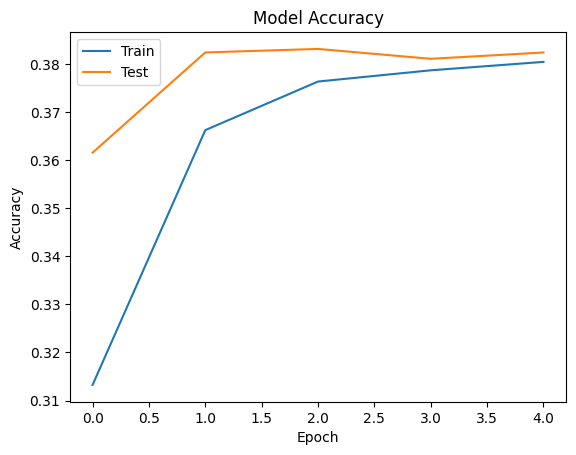

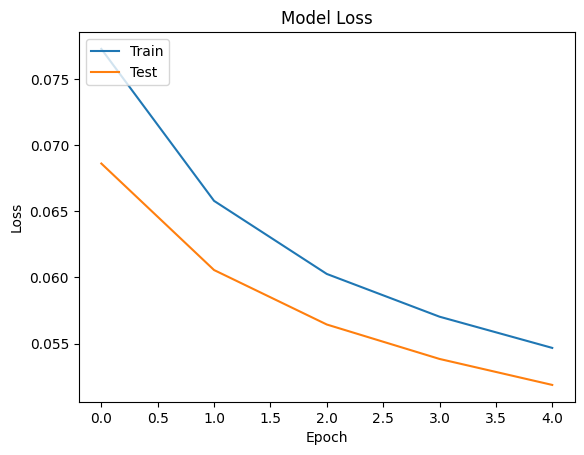

In [28]:
import matplotlib.pyplot as plt

# plot of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [36]:
# lets define a function to predict tags for given questions using the trained model

def predict_tags(question, tokenizer, model, mlb):
    seq = tokenizer.texts_to_sequences([question])
    padded_seq = pad_sequences(seq, maxlen=300)
    pred = model.predict(padded_seq , verbose=0)
    top_indices = np.argsort(pred[0])[-10:]
    top_tags = mlb.classes_[top_indices]
    return top_tags

questions = [
    "I'm getting a '404 Not Found' error when trying to deploy my Flask application to Heroku. How can I troubleshoot and fix this?",
    "What is the best way to handle user authentication in a Django project using PostgreSQL as the database backend?",
    "How can I optimize the performance of my React application by reducing the bundle size and improving load times?",
    "I'm new to data science and I'm confused about the differences between supervised and unsupervised learning algorithms. Can someone explain?",
    "What are some common techniques for securing a RESTful API built with Node.js and Express to prevent unauthorized access and protect user data?"
]

all_top_tags = []

for question in questions:
    top_tags = predict_tags(question, tokenizer, model, mlb)
    all_top_tags.append(top_tags)

for i, top_tags in enumerate(all_top_tags, 1):
    print(f"Tags for Question {i}:", top_tags)
    print()


Tags for Question 1: ['asp.net' 'visual-studio' 'javascript' 'xcode' 'java' '.net' 'iphone'
 'c#' 'ios' 'objective-c']

Tags for Question 2: ['sql' 'twitter-bootstrap' 'sqlite' 'ruby-on-rails' 'mongodb' 'database'
 'mysql' 'python' 'postgresql' 'django']

Tags for Question 3: ['visual-studio' 'php' 'javascript' 'xcode' 'java' 'iphone' '.net'
 'objective-c' 'ios' 'c#']

Tags for Question 4: ['xcode' 'asp.net' 'php' 'regex' 'iphone' 'objective-c' 'ios' '.net' 'c#'
 'java']

Tags for Question 5: ['html5' 'linux' 'c#' 'angularjs' 'mongodb' 'java' 'eclipse' 'jquery'
 'javascript' 'node.js']

